# Switched 1 kHz Sine Wave

In this example, we will a switched sine wave at a frequency of 1 kHz and a duty cycle of 50%. We will then plot the resulting signal in the time domain and in the frequency domain.

## Import Required Libraries

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
from scipy.signal import square
import wave, math

from matplotlib import pyplot as plt

## Define the Parameters such as the Sampling Frequency, the Duration of the Signal, and the Frequencies of the Sine Waves

In [2]:
# Variables
sRate = 100e3 # sample rate in Hertz (10 MHz)
freq1 = 1e3 # frequency of first sine wave (1 MHz)
freq2 = 500 # frequency of square wave (1 MHz)
amplitude1 = 1 # amplitude of first wave
amplitude2 = 1 # amplitude of second wave
numPeriods = 10 # number of periods of the waves
numSamples = sRate * numPeriods # total number of samples

## Create Plotting Helper Function

In [3]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

## Generate the X-Axis for the Time Domain Signal

The X-axis for the time domain signal will be generated using the `numpy` library. 

To generate the X-axis for the time domain signal, we will use the `numpy.linspace` function. This function generates an array of evenly spaced numbers over a specified interval. 

The function takes three arguments: `start`, `stop`, and `num`. The `start` argument specifies the starting value of the sequence, the `stop` argument specifies the end value of the sequence, and the `num` argument specifies the number of samples to generate.

In [4]:
# Create the x axis from 0 to numPeriods, divided into numSamples samples.
x = np.linspace(0, int(numPeriods), int(numSamples))

Print out the length of x to make sure it is numSamples long.

In [5]:
len(x)

1000000

## Generate the Sine Wave

In [6]:
f1 = amplitude1*np.sin(freq1*2*np.pi*x)

## Generate the Square Wave that is Half the Frequency of the Sine Wave

In [7]:
# Generate the square wave with the same number of samples as the sine wave
# and an amplitude of 1 by providing an amplitude of 0.5 and then adding 0.5 
# to the result.
f2 = 0.5*amplitude2*square(freq2*2*np.pi*x)+0.5*amplitude2

## Multiply the Sine Wave by the Square Wave

In [8]:
fcomb = f1 * f2

Check the length of the combined signal to make sure it is numSamples long.

In [9]:
len(fcomb)

1000000

## Plot the Time Domain Signals

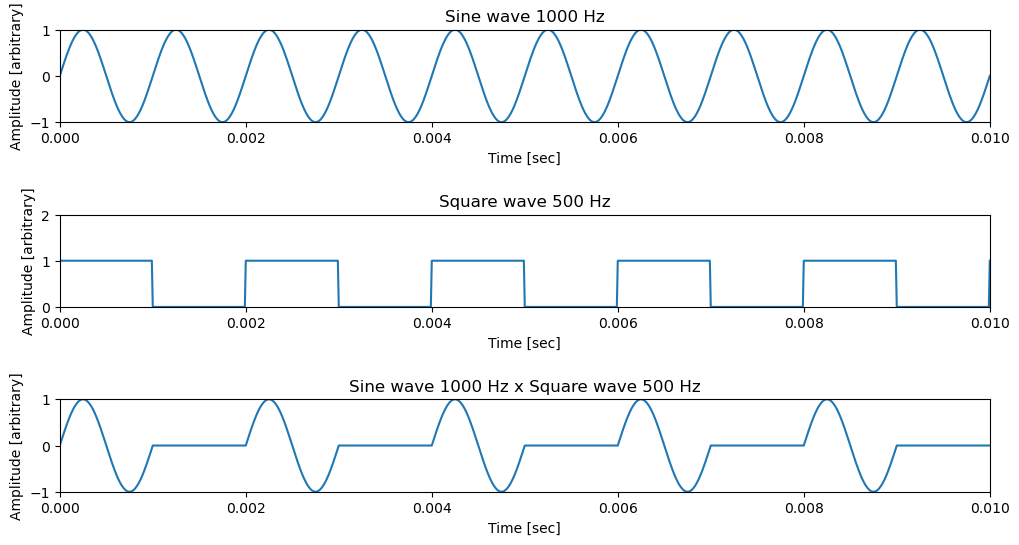

In [10]:
fig = plt.figure()
fig.set_size_inches(12,6)
plt.subplots_adjust(hspace=1)
t_final = 0.01 # seconds

plt.subplot(311)
plt.plot(x, f1)
plt.title('Sine wave {0:d} Hz'.format(int(freq1)))
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, t_final)
plt.ylim(np.floor(min(f1)), np.ceil(max(f1)))

plt.subplot(312)
plt.plot(x, f2)
plt.title('Square wave {0:d} Hz'.format(int(freq2)))
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, t_final)
plt.ylim(2*np.floor(min(f2)), 2*np.ceil(max(f2)))

plt.subplot(313)
plt.plot(x, fcomb)
plt.title('Sine wave {0:d} Hz x Square wave {1:d} Hz'.format(int(freq1), int(freq2)))
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, t_final)
plt.ylim(np.floor(min(fcomb)), np.ceil(max(fcomb)))
plt.show()

In [11]:
fft_output = np.fft.rfft(f1)
magnitude = [np.sqrt(i.real**2+i.imag**2)/len(fft_output) for i in fft_output]
frequencies = [(i*1.0/numSamples)*sRate for i in range(int(numSamples)//2+1)]

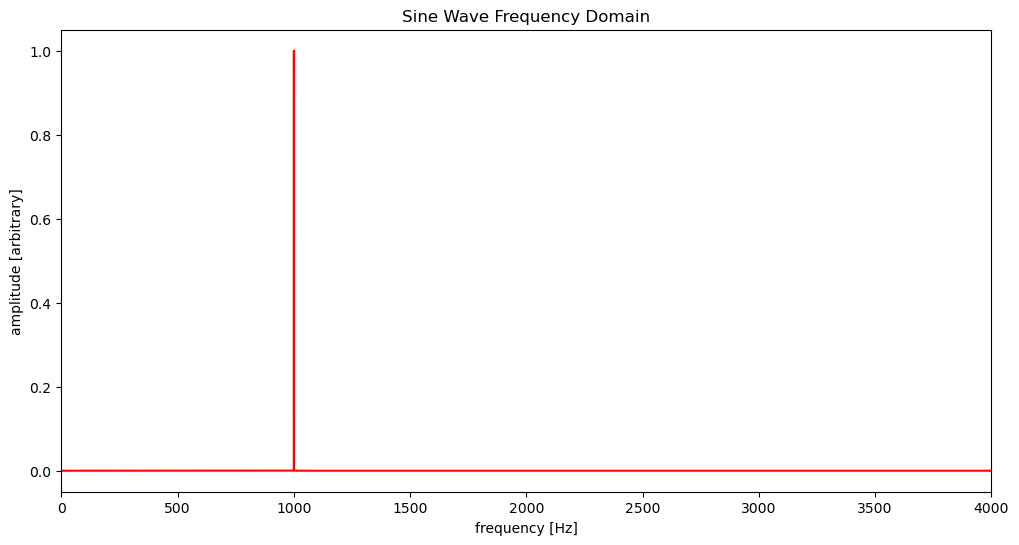

In [12]:
setup_graph(x_label='frequency [Hz]', y_label='amplitude [arbitrary]', 
            title='Sine Wave Frequency Domain', fig_size=(12,6))
plt.xlim(0, 4000)
plt.plot(frequencies, magnitude, 'r')
plt.show()


In [13]:
fft_output = np.fft.rfft(f2)
magnitude = [np.sqrt(i.real**2+i.imag**2)/len(fft_output) for i in fft_output]
frequencies = [(i*1.0/numSamples)*sRate for i in range(int(numSamples)//2+1)]

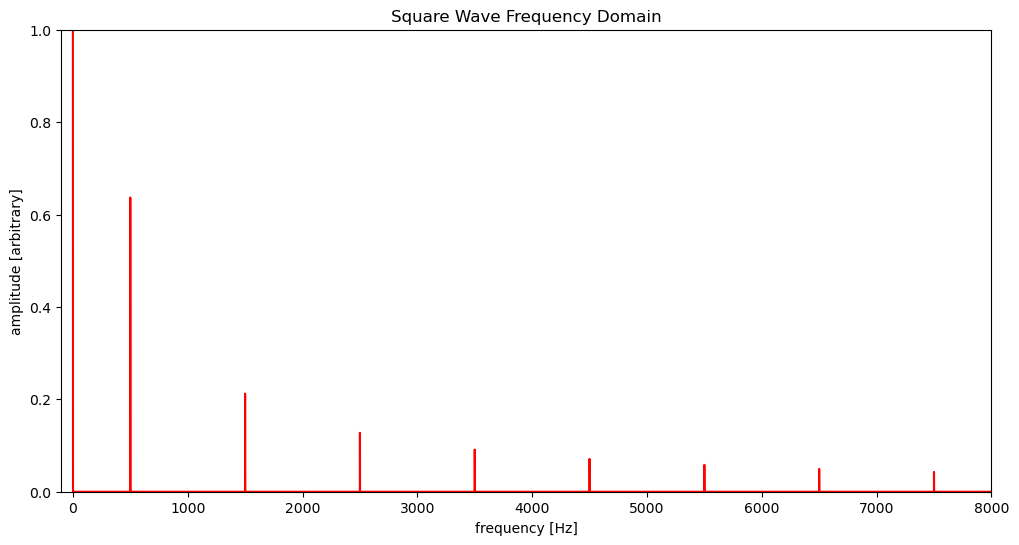

In [14]:
setup_graph(x_label='frequency [Hz]', y_label='amplitude [arbitrary]', 
            title='Square Wave Frequency Domain', fig_size=(12,6))
plt.xlim(-100, 8000)
plt.ylim(0, 1)
plt.plot(frequencies, magnitude, 'r')
plt.show()


In [15]:
fft_output = np.fft.rfft(fcomb)
magnitude = [np.sqrt(i.real**2+i.imag**2)/len(fft_output) for i in fft_output]
frequencies = [(i*1.0/numSamples)*sRate for i in range(int(numSamples)//2+1)]

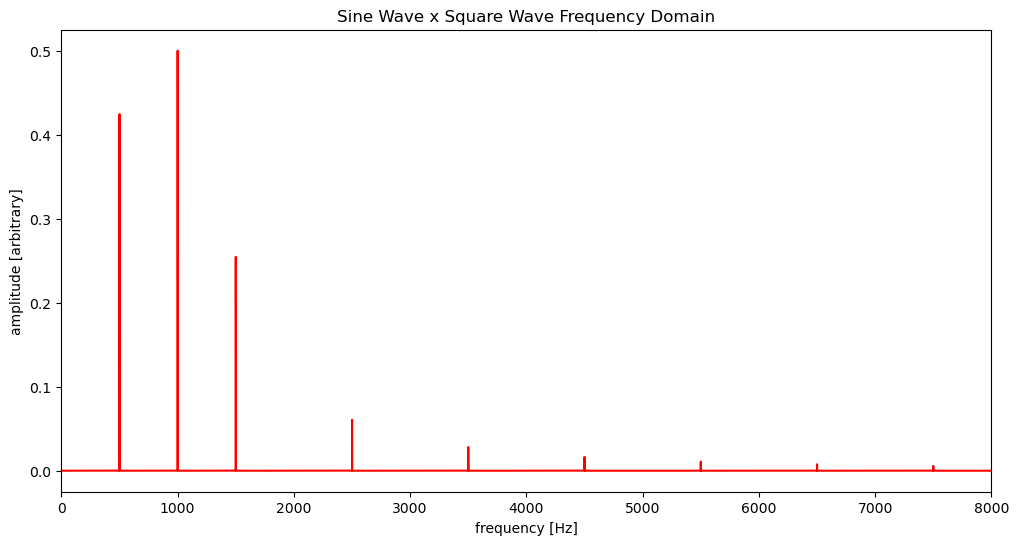

In [16]:
setup_graph(x_label='frequency [Hz]', y_label='amplitude [arbitrary]', 
            title='Sine Wave x Square Wave Frequency Domain', fig_size=(12,6))
plt.xlim(0, 8000)
plt.plot(frequencies, magnitude, 'r')
plt.show()


In [17]:
len(fcomb)

1000000

In [18]:
len(magnitude)

500001

In [19]:
len(frequencies)

500001

## Generate Output Files

Save the magnitude and the frequencies to files.  These files will be processed through the DFFT Fortran program.  The output of the program will be compared to the magnitude and frequencies generated by the Python program.

In [20]:
print ('Opening data files...')
dataFile = open('sw_sine_1kHz.dat', 'wt')  # To be run through Fortran code. Has amplitudes only.
td_dataFile = open('sw_sine_1kHz_time_domain.dat', 'wt')  # Has time domain amplitude and time data
fd_dataFile = open('sw_sine_1kHz_freq_domain.dat', 'wt')  # Has freq domain amplitude and corrected FFT frequencies (bins)

print ('Writing data files...')
np.savetxt(dataFile, fcomb, fmt='%10.10f', delimiter=' ', newline='\n')
np.savetxt(td_dataFile, np.column_stack([fcomb, x]), fmt='%10.10f', newline='\n')
np.savetxt(fd_dataFile, np.column_stack([magnitude, frequencies]), fmt='%10.10f', newline='\n')

Opening data files...
Writing data files...


## Execute DFFT Fortran Program

The DFFT Fortran program will be executed on the data file that contains the time domain data of the combined signal.  The program will output the magnitude and phase of the Fourier transform of the signal into two separate files: DFFT_mag_file.dat and DFFT_phase_file.dat.

In [21]:
import os
exec_status = os.system("./dfft sw_sine_1kHz.dat DFFT_mag_file.dat DFFT_phase_file.dat 100000 10 > log.txt")

## Plot the DFFT Program Output

In [22]:
DFFT_mag_raw_data = np.loadtxt('DFFT_mag_file.dat')
DFFT_phase_raw_data = np.loadtxt('DFFT_phase_file.dat')

In [23]:
# Get the frequency bins
DFFT_freq_bins = [row[1] for row in DFFT_mag_raw_data]

In [24]:
# Get the magnitude data
DFFT_mag_data = [row[0] for row in DFFT_mag_raw_data]

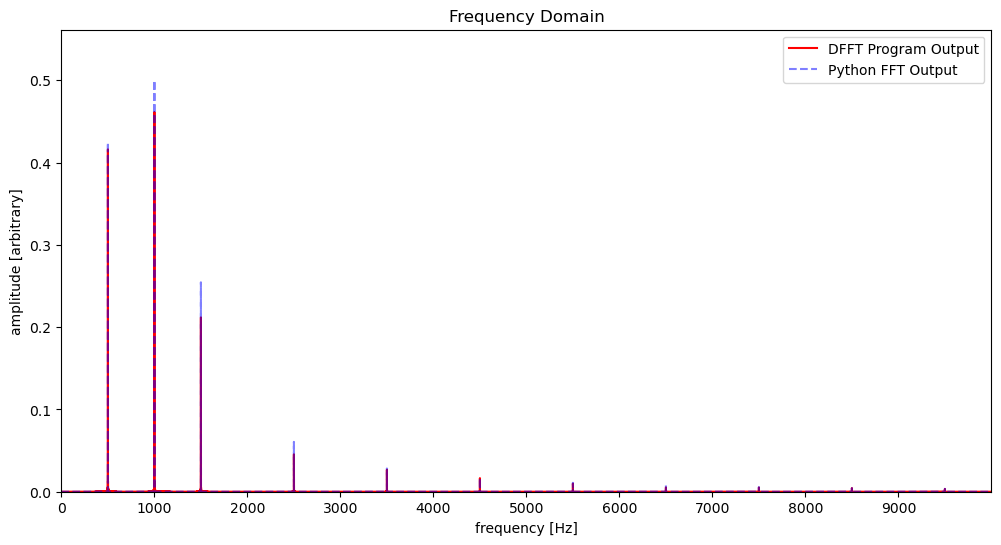

In [25]:
# Plot the magnitude data
setup_graph(x_label='frequency [Hz]', y_label='amplitude [arbitrary]', 
            title='Frequency Domain', fig_size=(12,6))
plt.plot(DFFT_freq_bins, DFFT_mag_data, 'r', label = 'DFFT Program Output')
plt.plot(frequencies, magnitude, linestyle='--', color='blue', alpha=0.5, label = 'Python FFT Output')
plt.legend()
plt.xlim(0, sRate/numPeriods)
plt.ylim(0, max(DFFT_mag_data)+0.1)
plt.xticks(np.arange(0, sRate/numPeriods, step=1000))
plt.show()

## Discussion
When we compare the Python program output to the DFFT program output, we see that the magnitude and phase of the Fourier transform of the signal are almost the same.  The slight differences are due to the leakage of some of the energy of the signal into the neighboring frequency bins.  This is a common problem when using the Fourier transform to analyze signals.  The leakage can be reduced by using a window function to taper the signal before taking the Fourier transform.